# An English man in New York

## Capstone Project: The Battle of Neighborhoods.
This is the final assignment of the Applied Data Science Capstone Course by IBM on Coursera.

## Introduction

<p style="color:Gray; font-style:italic;">Introduction; where you discuss the business problem and who would be interested in this project.</p>

Meaning of “Englishman in New York” song by Sting

Englishman in New York is a song performed by English singer and songwriter Sting. The self-explanatory lyrics of the song talk about the life of an Englishman who has moved from his native England to live in New York City. The “Englishman” in the song is the famous English gay icon, writer and actor Quentin Crisp, who was the inspiration of the song. In 1986, Crisp relocated from London, England to Manhattan, New York City, and Sting wrote the song shortly after Crisp’s relocation.

In Sting’s 2007 book titled Lyrics, the singer said he felt so homesick the first time he moved to live in New York that he was forced to move from one English pub to the other just so he could meet with other Englishmen and enjoy the feeling of being home.

https://www.songmeaningsandfacts.com/meaning-englishman-new-york-sting/

So, let's go on a short journey to discover such places in New York City. Restaurants, Pubs, Fish and Chip shops, etc. This would be interesting if you were commissioned to write an article or tourist information brochure. But let's consider that a friend is looking to open their own such establishment, for which we need to do a small amount of analysis to get things started.

## Data

<p style="color:Gray; font-style:italic;">Data; where you describe the data that will be used to solve the problem and the source of the data.</p>

New York City data containing the neighborhoods and boroughs, longitudes and latitudes will be obtained from the data source: https://cocl.us/new_york_dataset

All data related to locations and quality of English restaurants will be obtained via the FourSquare API. The data in FourSquare under the category "English Restaurant" is actually quite limited. But there is also the category "Pub" and "Fish & Chips Shop", which are also terms that may uniquely describe an English restaurant. So, we will include all three categories when collecting data.

NOTE: The following developer resource on ForeSquare can be used to determine available venue categories.

https://developer.foursquare.com/docs/build-with-foursquare/categories/

## Methodology

<p style="color:Gray; font-style:italic;">Methodology section; which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.</p>

I will use this section to describe each relevant step of the processing (python code sections), AKA "exploratory data analysis".

<u>Use a function to get initial New York data</u>

This is where we read New York data from the data source: https://cocl.us/new_york_dataset and create a dataset containing the neighborhoods and boroughs, longitudes and latitudes.

<u>Discover the total of number of different Neighborhoods in New York</u>

Basically, the neighborhoods in New York are located within five boroughs. Bronx, Brooklyn, Manhattan, Queens and Staten Island. The following Wikipedia link helps to visualise this;

https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City

<u>Perform initial data analysis</u>

Here we graph the number of neighborhoods in each borough. Which has the most? Which has the least? Is this significant in our data analysis?

<u>Further analysis to see how many English Restaurants there are in each neighborhood and borough.</u>

This is where we try to determine where exactly in these New York boroughs/neghbourhoods our English restaurants reside. Mainly due to English terminology, we are using the categories 'English Restaurant', 'Pub', and 'Fish & Chips Shop' to determine all potential English Restaurants. This is also where we do the majority of your FourSquare API calls, which we save to a csv file in the next step to limit further calls.

<u>Discover the locale of said English Restaurants</u>

Now we graph the data we have collected. English restaurants per borough/neghbourhood (two graphs). This helps visualise popular places for such an establishment.

<u>Discover the ratings of said English Restaurants</u>

In this next part of our analysis, we collate the number of likes, ratings, and tips for each English restaurant.

<u>Discover which English Restaurants have the greatest number of Likes, Ratings, Tips</u>

The number of Likes, Ratings, and Tips is a good indication of how busy or popular a venue may be.

<u>Discover the neighborhoods with the best average ratings of restaurants and discover the boroughs with the best average ratings of restaurants and visualize in a graph</u>

These two parts of the analysis may be quite significant. People (both tourists and locals) will likely gravitate to areas where ratings are high.

<u>Discover all the neighborhoods with average rating greater or equal to 7.5 (upper quartile) to visualize on a map</u>

So now we take it to the next level and subsequently visualise on a map, but only those venues in the upper quartile for ratings.

## Import required librarys

In [6]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1j             |       h7f98852_0         2.1 MB  conda-forge
    pandas-1.1.5               |   py36h284efc9_0        11.3 MB  conda-forge
    pytz-2021.1                |     pyhd8ed1ab_0         239 KB  conda-forge
    toolz-0.11.1               |             py_0          46 KB  conda-

## Define Foursquare credentials and version

In [7]:
CLIENT_ID = 'T1TX1XA3ILP3KPPZRFS0L00WB4EAIRRSBQSYMBF2QXBDZH5X' # your Foursquare ID
CLIENT_SECRET = 'NLRUS4M3WPR1LWL3A31GQBMXGAKIE1HAQ3D5TI5CHL2NEREV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

## Define functions for use with this project

In [8]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data = results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

## Use a function to get initial New York data

In [9]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


## Discover the total of number of different Neighborhoods in New York

In [10]:
ny_data.shape

(306, 4)

## Perform initial data analysis

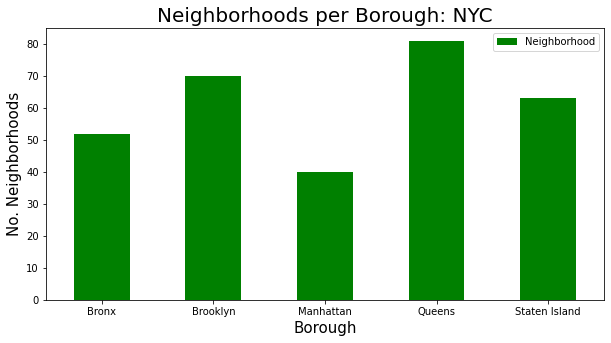

In [11]:
clr = "green"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

## Further analysis to see how many English Restaurants there are in each Neighborhood and borough.

Remember, we are using the categories 'English Restaurant', 'Pub', and 'Fish & Chips Shop' to determine all potential English Restaurants.

In [13]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
english_rest_ny=pd.DataFrame(columns=column_names)
# Process English Restaurants
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    english_restaurants=venues[venues['Category']=='English Restaurant']   
    print('(',count,'/',len(ny_data),')','English Restaurants in '+Neighborhood+', '+Borough+':'+str(len(english_restaurants)))
    print(row)
    for resturant_detail in english_restaurants.values.tolist():
        id, name , category=resturant_detail
        english_rest_ny = english_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1
# Process Pubs    
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    pubs=venues[venues['Category']=='Pub']   
    print('(',count,'/',len(ny_data),')','Pubs in '+Neighborhood+', '+Borough+':'+str(len(pubs)))
    print(row)
    for pub_detail in pubs.values.tolist():
        id, name , category=pub_detail
        english_rest_ny = english_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1
# Process Fish & Chips Shops
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)    
    fish_and_chips_shops=venues[venues['Category']=='Fish & Chips Shop']   
    print('(',count,'/',len(ny_data),')','Fish & Chips Shops in '+Neighborhood+', '+Borough+':'+str(len(fish_and_chips_shops)))
    print(row)
    for fish_and_chips_shop_detail in fish_and_chips_shops.values.tolist():
        id, name , category=fish_and_chips_shop_detail
        english_rest_ny = english_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) English Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) English Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) English Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) English Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) English Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) English Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) English Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) English Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) English Restaurants in Norwood, Bronx:0
['

## Save data to a csv file to minimise further calls to ForeSquare

This part was important with my limited ForeSquare account. I found that I kept running out of API calls while testing this code!

In [14]:
english_rest_ny.to_csv('english_rest_ny.csv')

In [15]:
english_ny = pd.read_csv('english_rest_ny.csv')
english_rest_ny.tail()

,Borough,Neighborhood,ID,Name
30,Bronx,Norwood,4f7353aae4b017195086577b,7's fish market
31,Bronx,Morrisania,4e179d1cd4c062b044e04246,Come And Get It Fish And Chips
32,Queens,Murray Hill,57d2e506498ebceb8b58974a,Gupji
33,Brooklyn,Wingate,4f40601ce4b0102f0d7c4b17,Fish N Chips (Soul of the Sea)
34,Staten Island,Sandy Ground,4eeb838677c8dc54c62a7d4b,Woodrow Fish Market


## Discover the total number of English Restaurants

In [16]:
english_rest_ny.shape

(35, 4)

## Discover the locale of said English Restaurants

Further analysis shows where the greatest number of English Restaurants reside per borough and per neighborhood.

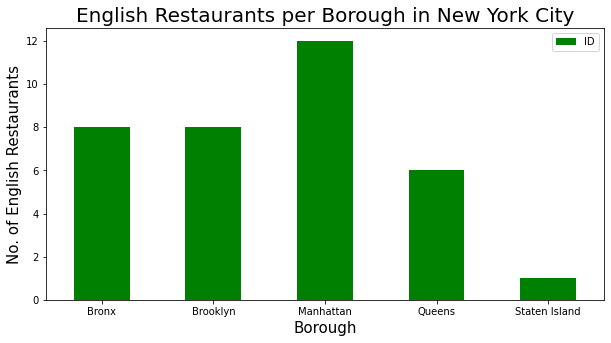

In [17]:
english_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('English Restaurants per Borough in New York City', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of English Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

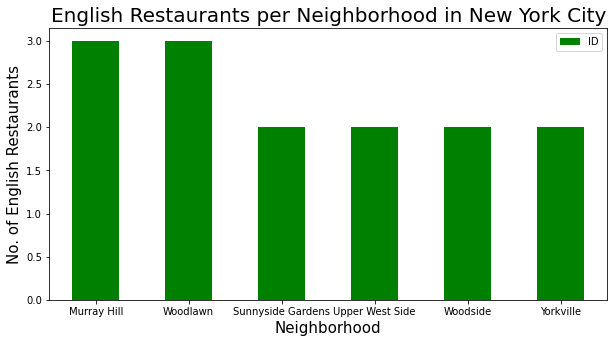

In [18]:
english_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(6).plot.bar(figsize=(10,5), color=clr)
plt.title('English Restaurants per Neighborhood in New York City', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of English Restaurants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

## Discover the ratings of said English Restaurants

In [19]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
english_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in english_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        # print('No data available for id=',ID)
        # Assign a 0 value for resturants with no rating (uncomment above to show outputs for debugging)
        id,name,likes,rating,tips=[0]*5
    # print('(',count,'/',len(english_rest_ny),')','processed')
    # Uncomment above to show outputs for debugging
    english_rest_stats_ny = english_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

{'meta': {'code': 200, 'requestId': '60509f3162d9b434d7e97aca'}, 'response': {'venue': {'id': '5eee4fe91b8f000008d6d769', 'name': 'Dame', 'contact': {}, 'location': {'address': '85 Macdougal St', 'lat': 40.728938, 'lng': -74.001676, 'labeledLatLngs': [{'label': 'display', 'lat': 40.728938, 'lng': -74.001676}], 'postalCode': '10012', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['85 Macdougal St', 'New York, NY 10012', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/dame/5eee4fe91b8f000008d6d769', 'categories': [{'id': '52e81612bcbc57f1066b7a05', 'name': 'English Restaurant', 'pluralName': 'English Restaurants', 'shortName': 'English', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}], 'verified': False, 'stats': {'tipCount': 1}, 'likes': {'count': 11, 'groups': [{'type': 'others', 'count': 11, 'items': []}], 'summary': '11 Likes'}, 'dislike': False, 'ok': False, 

In [20]:
english_rest_stats_ny.tail()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
30,Bronx,Norwood,0,0,0,0.0,0
31,Bronx,Morrisania,0,0,0,0.0,0
32,Queens,Murray Hill,57d2e506498ebceb8b58974a,Gupji,7,6.5,3
33,Brooklyn,Wingate,4f40601ce4b0102f0d7c4b17,Fish N Chips (Soul of the Sea),7,6.9,0
34,Staten Island,Sandy Ground,0,0,0,0.0,0


## Again, save data to a csv file to minimise further calls to ForeSquare

In [21]:
english_rest_stats_ny.to_csv('english_rest_stats_ny.csv')

## Check the number of statistics returned

In [22]:
english_rest_stats_ny.shape

(35, 7)

## Check and convert data types as needed

In [23]:
english_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       35 non-null     object 
 1   Neighborhood  35 non-null     object 
 2   ID            35 non-null     object 
 3   Name          35 non-null     object 
 4   Likes         35 non-null     object 
 5   Rating        35 non-null     float64
 6   Tips          35 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.0+ KB


In [24]:
english_rest_stats_ny['Likes'] = english_rest_stats_ny['Likes'].astype('float64')
english_rest_stats_ny['Tips'] = english_rest_stats_ny['Tips'].astype('float64')
english_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       35 non-null     object 
 1   Neighborhood  35 non-null     object 
 2   ID            35 non-null     object 
 3   Name          35 non-null     object 
 4   Likes         35 non-null     float64
 5   Rating        35 non-null     float64
 6   Tips          35 non-null     float64
dtypes: float64(3), object(4)
memory usage: 2.0+ KB


In [25]:
english_rest_stats_ny.describe()

,Likes,Rating,Tips
count,35.000000,35.000000,35.000000
mean,107.514286,6.548571,37.457143
std,135.164904,2.800249,45.383557
min,0.000000,0.000000,0.000000
25%,10.000000,6.500000,2.500000
50%,53.000000,7.700000,21.000000
75%,182.000000,8.150000,58.500000
max,609.000000,8.700000,187.000000


## Discover which English Restaurants have the greatest number of Likes, Ratings, Tips

In [26]:
# Resturant with the most Likes
english_rest_stats_ny.iloc[english_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                 Murray Hill
ID              4b19bf81f964a52050e323e3
Name                  Cask Bar & Kitchen
Likes                                609
Rating                               8.7
Tips                                 187
Name: 20, dtype: object

In [27]:
# Resturant with the most Ratings
english_rest_stats_ny.iloc[english_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                 Murray Hill
ID              4b19bf81f964a52050e323e3
Name                  Cask Bar & Kitchen
Likes                                609
Rating                               8.7
Tips                                 187
Name: 20, dtype: object

In [28]:
# Resturant with the most Tips
english_rest_stats_ny.iloc[english_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood                 Murray Hill
ID              4b19bf81f964a52050e323e3
Name                  Cask Bar & Kitchen
Likes                                609
Rating                               8.7
Tips                                 187
Name: 20, dtype: object

## Discover the neighborhoods with the best average ratings of restaurants

In [29]:
ny_neighborhood_stats=english_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
3,Clinton Hill,8.6
7,Greenwich Village,8.6
10,Kingsbridge,8.5
11,Morningside Heights,8.5
0,Astoria,8.4
5,Financial District,8.1
21,Upper West Side,8.0
14,North Side,8.0
22,Westchester Square,7.8
13,Murray Hill,7.8


## Discover the boroughs with the best average ratings of restaurants and visualize in a graph

In [30]:
ny_borough_stats=english_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
2,Manhattan,7.750000
1,Brooklyn,7.475000
3,Queens,7.333333
0,Bronx,4.050000
4,Staten Island,0.000000


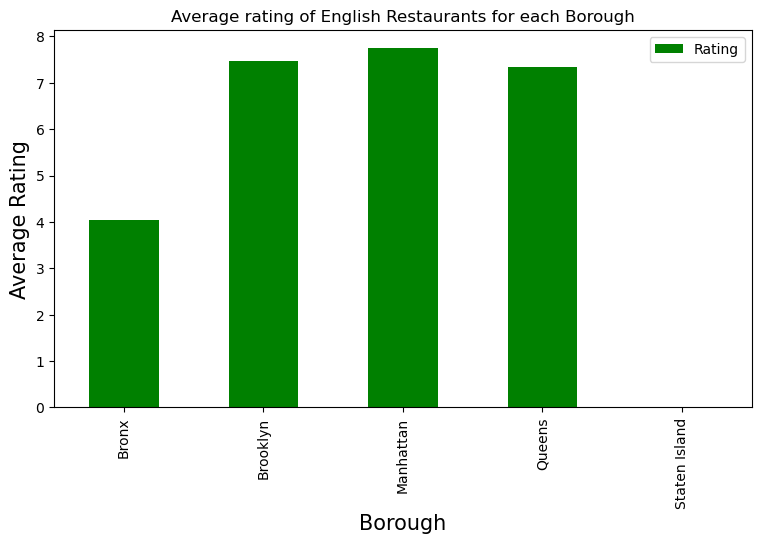

In [31]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of English Restaurants for each Borough')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
english_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

## Discover all the neighborhoods with average rating greater or equal 7.5 (upper quartile) to visualize on a map

In [32]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.5]
ny_neighborhood_stats

,Neighborhood,Average Rating
0,Astoria,8.40
1,Brooklyn Heights,7.60
3,Clinton Hill,8.60
4,Edgewater Park,7.80
5,Financial District,8.10
7,Greenwich Village,8.60
10,Kingsbridge,8.50
11,Morningside Heights,8.50
13,Murray Hill,7.80
14,North Side,8.00


## Add longitude and latitude from the original New York dataset to our new dataset

In [33]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Queens,Astoria,40.768509,-73.915654,8.40
1,Brooklyn,Brooklyn Heights,40.695864,-73.993782,7.60
2,Brooklyn,Clinton Hill,40.693229,-73.967843,8.60
3,Bronx,Edgewater Park,40.821986,-73.813885,7.80
4,Manhattan,Financial District,40.707107,-74.010665,8.10
5,Manhattan,Greenwich Village,40.726933,-73.999914,8.60
6,Bronx,Kingsbridge,40.881687,-73.902818,8.50
7,Manhattan,Morningside Heights,40.808000,-73.963896,8.50
8,Manhattan,Murray Hill,40.748303,-73.978332,7.80
9,Queens,Murray Hill,40.764126,-73.812763,7.80


## Show the map with additional labeling

In [34]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the ratings in the dataframe
rating = folium.map.FeatureGroup()

# loop through the ratings and add each to the neighborhood feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [35]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add ratings to map
ny_map.add_child(rating)

## Results / Discussion / Observations

<p style="color:Gray; font-style:italic;">Results section where you discuss the results, any observations you noted and any recommendations you can make based on the results.</p>

So, the total number of English restaurants is 34. As stated before, this includes venues from three FourSquare categories, "English restaurant", "Pub" and "Fish & Chips Shop". As potentially these could all be classed as English restaurants. I note that one venue in our dataset is called "Woodrow Fish Market". Which doesn't sound like a restaurant. So, we may need to refine our dataset further to validate each venue.

Of those 34, most appear to be in the borough of Manhattan. More specifically, in the neighbourhood of Murray Hill. Although Woodlawn in Queens appears to have quite a few also. Again, more analysis could be done here to determine precisely what type of English restaurants reside in which borough/neighbourhood. For example, one restaurant may serve a lot of steak dishes, another may provide a lot of choice in real ale and pies. And are such traits determined by locale?

Now imagine if the same restaurant transpired to have the most amount of Likes and tips, AND the best Ratings. Surely this would be the place to go as an English man in New York. Or perhaps a good business model to use when opening your own establishment? Well, there is one such establishment, the Cask Bar & Kitchen. And where is it? Murray Hill in Manhattan of course.

Interestingly though, when we look at neighborhoods with the best average ratings of restaurants, Murray Hill is not on the list. What does this mean? After all, this is where the most English restaurants reside. Perhaps all other English restaurants in this area have poor ratings? Or maybe there are a lot of new restaurants that quite simply have no ratings yet.

However, the borough of Manhattan does have the best average ratings of restaurants.

Finally, the map we generated shows neighborhoods with average rating greater or equal 7.5 (upper quartile). This seems to give a fairly widespread, so perhaps we need to narrow this down my increasing the average rating parameter? However, this has probably removed all the neighbourhoods that are not worth visiting.

## Conclusion

<p style="color:Gray; font-style:italic;">Conclusion section where you conclude the report.</p>

The results of our analysis have given us a lot of useful information and insight. However, it has also raised a lot of questions. But this is good, as these are questions that we may not have previously thought of. And my friend does need to do make sure the research is thorough before investing any time and money. At the very least, it has given us some specific venues and neighbourhoods that are worth visiting while continuing said research.

The next step would be to refine our dataset / data analysis further. For instance, I did not use any machine learning, as I did not think it would be useful this time. So perhaps we could try a different analysis method and compare the results?

But we can also use what we have as the basis for more traditional research. For example, consider the following article.

The Five Boroughs of New York City https://www.nycgo.com/neighborhoods-boroughs/about-nyc-five-boroughs/

This describes the boroughs in great detail. Are there any parallels between this and our data analysis? 

Just for fun, let's also consider the following film.

Gangs of New York: https://en.wikipedia.org/wiki/Gangs_of_New_York

"In the 1846 slum neighborhood of Five Points, Manhattan, two gangs, the Nativist Protestants, led by William "Bill the Butcher" Cutting, and a group of Irish Catholic immigrants, the "Dead Rabbits", led by "Priest" Vallon, engage in a battle to determine which faction will hold sway over the territory."

Does history have a part to play on the location of said venues? For example, there is no real difference between an English Pub and an Irish Pub. The food, drink and atmosphere are really quite similar. If a certain neighborhood has a certain amount of English or Irish history, this would be good for business.